# Introdiction to Data Science (BLM19432E) - Final Project

Name Surname: Kevser Büşra YILDIRIM 

Dataset Name: Breast Cancer Wisconsin (Diagnostic) Data Set

Dataset Definition: Predict whether the cancer is benign or malignant using features such as radius, smoothness, etc.

Dataset Source (web address): https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data 
Aim of the project: To determine whether a cell is a cancerous (malignant) or non-cancerous (benign) cell as a result of featurelar-based studies.
### Variable Description
Target (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Contents

#### Preprocessing
    - 1) Drop nulls and duplicates
    - 2) Label Encoding
    - 3) Split test and train dataset
    - 4) Scaling
      - 4.1) Standard Scale
      - 4.2) Min-Max Scale
    - 5) PCA
    - 6) LDA
    - 7) Remove Outliers
    - 8) Impute
    
#### Feature Selection    
    - 1) Feature Selection using K-Best
    - 2) Recursive Feature Elimination (RFE)
    - 3) Feature Selection using Data Correlation

#### Machine Learning Algorithms

###### - Supervised Learning Algorithms
    - 1) Logistic Regression
      - 1.1) Parameter Tuning for Logistic Regression
    - 2) Naive Bayes 
    - 3) KNN Classifier
    - 4) Random Forest Classiefier
    - 5) Decision Tree classifier
    
    - 6) Evauate Recall

###### - Unsupervised Learning Algorithms
    - 1) K-Means Clustering
      - 1.1) Parameter Tuning for K-Means Clustering
    - 2) Gaussian Mixture Model (GMM) Clustering 
    
#### Multimodel Parameter Tuning
    - 1) Grid Search
    - 2) Random Search
    
#### Pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score, homogeneity_completeness_v_measure
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix,recall_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
    warnings.simplefilter(action = "ignore", category = FutureWarning)
    warnings.simplefilter(action = "ignore", category = RuntimeWarning)

### >>> Preprocessing 

In [3]:
data = pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Remove Duplicates
data.drop_duplicates()
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
data = data.drop(columns='Unnamed: 32')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

In [8]:
X1 = X.copy()
y1 = y.copy()

In [9]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [10]:
#Verideki nümerik olmayan değerler label değerleri M=1 B=0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

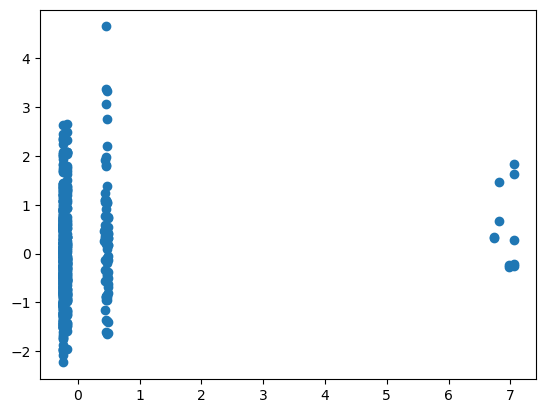

In [11]:
#Veriyi ayırmadan önce ölçeklendiriyoruz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[:, 0], X_scaled[:, 2])

Standart Scaler kullandığım zaman negatif değerlerde sonuç vermekte ve feature selection kısmında hataya neden olmakta. Scale değerlerimi 0-1 arasında olması için MinMaxScaler tercih edeceğim.

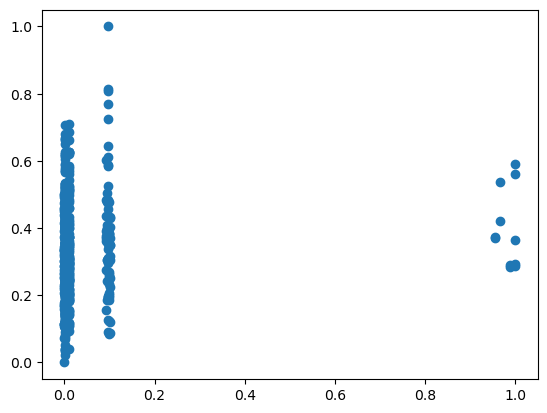

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[:, 0], X_scaled[:, 2])

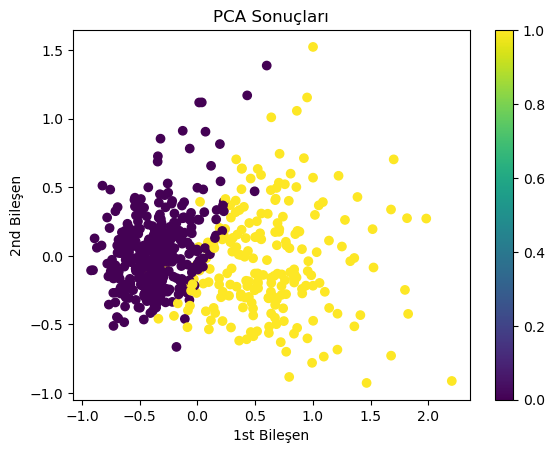

In [13]:
pca = PCA(n_components=2)

# PCA ile boyut azaltma
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_  # Var
components = pca.components_  # özvektörler

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y) 
plt.xlabel('1st Bileşen')
plt.ylabel('2nd Bileşen')
plt.title('PCA Sonuçları')
plt.colorbar()
plt.show()

In [14]:
X2 = X_scaled.copy()
y2 = y.copy()

In [15]:
# LDA modelini oluşturma
lda = LinearDiscriminantAnalysis(n_components=1)  # Boyut azaltma için hedeflenen boyut sayısı: 1
# Training
X_lda = lda.fit_transform(X2, y2)

print("Dönüştürülen veri:")
print(X_lda)

Dönüştürülen veri:
[[-3.32573950e+00]
 [-2.32980231e+00]
 [-3.74168594e+00]
 [-4.02099034e+00]
 [-2.27542857e+00]
 [-1.61359707e+00]
 [-2.36099631e+00]
 [-1.26548864e+00]
 [-1.61020071e+00]
 [-3.84779257e+00]
 [-8.74434723e-01]
 [-2.38966562e+00]
 [-1.32604413e+00]
 [-4.39305589e-01]
 [-1.23446201e+00]
 [-3.05707022e+00]
 [-2.11843040e+00]
 [-3.15449180e+00]
 [-3.45996483e+00]
 [ 2.16734075e-01]
 [ 1.98246260e+00]
 [ 2.45782808e+00]
 [-1.79234919e+00]
 [-3.03844379e+00]
 [-3.88840091e+00]
 [-4.00012163e+00]
 [-2.74716629e+00]
 [-2.58914794e+00]
 [-3.08685045e+00]
 [-7.99429368e-01]
 [-3.42293932e+00]
 [-2.68742343e+00]
 [-3.62626449e+00]
 [-3.09282743e+00]
 [-2.69315757e+00]
 [-2.58174452e+00]
 [-1.08250229e+00]
 [ 1.87622980e+00]
 [ 4.79916763e-01]
 [-9.44429392e-01]
 [ 2.22464732e-01]
 [-2.95271410e-01]
 [-4.10870605e+00]
 [-1.46818120e+00]
 [-1.39818610e+00]
 [-3.45088299e+00]
 [ 3.28741599e+00]
 [-2.18209693e+00]
 [ 1.28915094e+00]
 [ 2.93591311e-01]
 [ 1.62120028e+00]
 [ 1.4862365

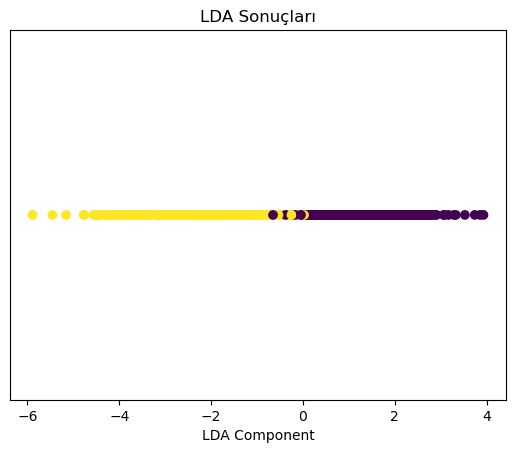

In [16]:
plt.scatter(X_lda, [0] * len(X_lda), c=y2, cmap='viridis')
plt.xlabel('LDA Component')
plt.yticks([])
plt.title('LDA Sonuçları')
plt.show()

In [17]:
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
X_no_outliers = X_scaled[~((X_scaled < lower_bound) | (X_scaled > upper_bound)).any(axis=1)]
y_no_outliers = y[~((X_scaled < lower_bound) | (X_scaled > upper_bound)).any(axis=1)]

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_no_outliers)
X_imputed

array([[0.00091702, 0.5333428 , 0.34731146, ..., 0.66391753, 0.29528878,
        0.18785255],
       [0.00091842, 0.42780065, 0.45755834, ..., 0.34278351, 0.27261975,
        0.19336219],
       [0.00091924, 0.41975484, 0.48156916, ..., 0.38453608, 0.24521979,
        0.05135773],
       ...,
       [0.00100581, 0.36012116, 0.43862022, ..., 0.37972509, 0.13660556,
        0.16397744],
       [0.00100583, 0.33456387, 0.58978695, ..., 0.36013746, 0.13502858,
        0.18476978],
       [0.00100765, 0.45525108, 0.62123774, ..., 0.48728522, 0.12872068,
        0.1519087 ]])

In [19]:
np.isnan(np.sum(X_imputed))

False

In [20]:
np.isnan(np.sum(y_no_outliers))

False

### >>> Feature Selection 

#### 1 - Feature Selection using K-Best

In [21]:
selector = SelectKBest(score_func=chi2, k=10)  # en iyi k=10 öznitelik
X_selected = selector.fit_transform(X_imputed, y_no_outliers)
X_selected

array([[0.5333428 , 0.52387534, 0.38027572, ..., 0.34919387, 0.30223642,
        0.66391753],
       [0.42780065, 0.40709004, 0.27753977, ..., 0.23712151, 0.11653355,
        0.34278351],
       [0.41975484, 0.41400041, 0.27113468, ..., 0.16990267, 0.18546326,
        0.38453608],
       ...,
       [0.36012116, 0.36348559, 0.2178579 , ..., 0.13475718, 0.29249201,
        0.37972509],
       [0.33456387, 0.32886463, 0.193807  , ..., 0.12817047, 0.10591054,
        0.36013746],
       [0.45525108, 0.44578813, 0.30311771, ..., 0.23073142, 0.27180511,
        0.48728522]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_no_outliers, test_size=0.2, random_state=42)

In [23]:
print("X_train şekli:", X_train.shape)
print("X_test şekli:", X_test.shape)
print("y_train şekli:", y_train.shape)
print("y_test şekli:", y_test.shape)

X_train şekli: (276, 10)
X_test şekli: (70, 10)
y_train şekli: (276,)
y_test şekli: (70,)


#### 2 - Feature Selection using Recursive Feature Elimination (RFE)

In [24]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=5)  # choose 5 features

In [25]:
# Fit RFE to your data
X_selected_RFE = rfe.fit_transform(X_imputed, y_no_outliers)

In [26]:
selected_feature_indexes = rfe.get_support()

# Seçilen özellikleri X_train veri kümesinden alın
selected_features_RFE = X_imputed[:, selected_feature_indexes]


In [27]:
X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(selected_features_RFE, y_no_outliers, test_size=0.2, random_state=42)

In [28]:
print("X_train_RFE şekli:", X_train_RFE.shape)
print("X_test_RFE şekli:", X_test_RFE.shape)
print("y_train_RFE şekli:", y_train_RFE.shape)
print("y_test_RFE şekli:", y_test_RFE.shape)

X_train_RFE şekli: (276, 5)
X_test_RFE şekli: (70, 5)
y_train_RFE şekli: (276,)
y_test_RFE şekli: (70,)


#### 3 - Data Correlation

/var/folders/81/txnkj61j645by4lfxr0d27hm0000gn/T/ipykernel_2505/3002295924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


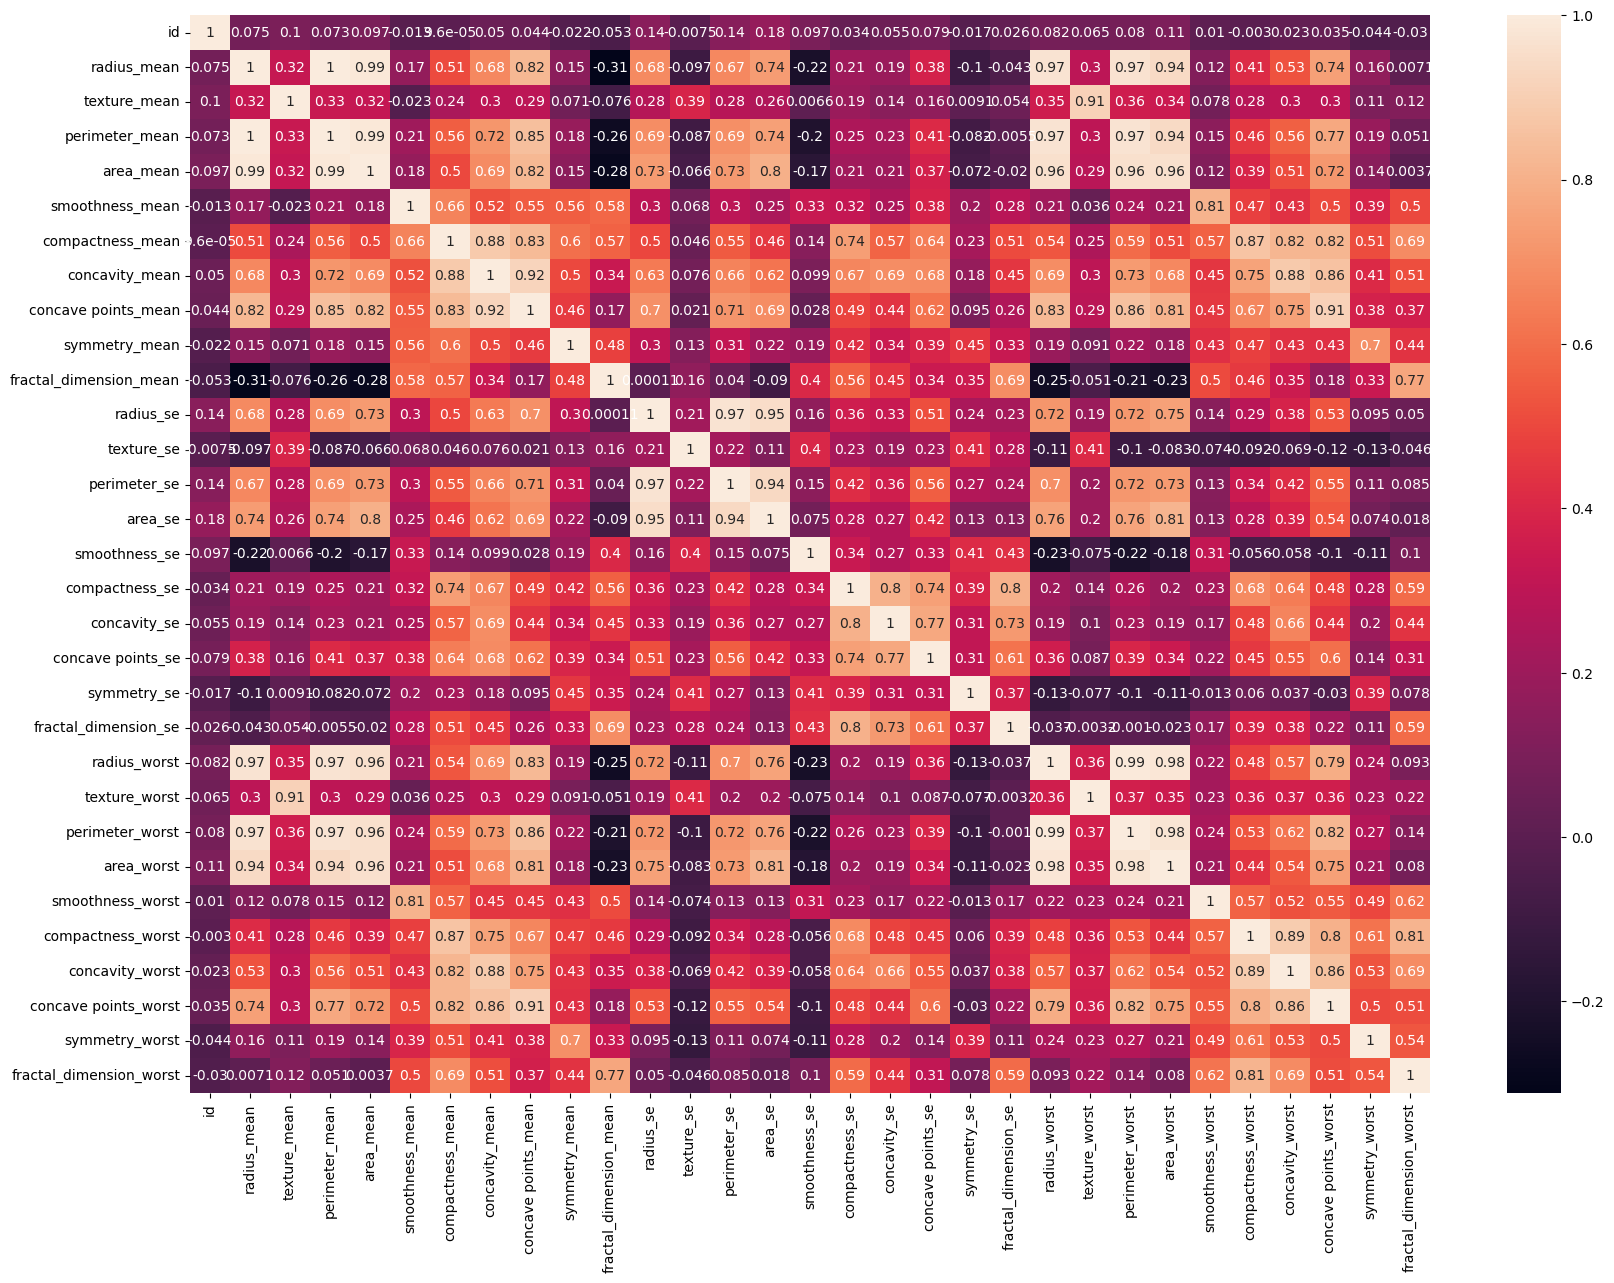

In [ ]:
plt.figure(figsize = (20, 14))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [30]:
# Correlations with target
# data isimli df'de etiket değerleri olan diagnosis sütununu y isimli np arrayinde tutuyordum ve silmiştim
# bu nedenle data2 df'ine kopyasına oluşturup tekrardan ekledim.
data2 = data.copy()
data2['diagnosis'] = y

corr = data2.corr()['diagnosis'].sort_values(ascending=False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")


,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


Yukarıda görüldüğü üzere en az ilişkili 6 feature silinerek feature selection yapılabilir.

In [31]:
data2 = data2.drop(columns = ['fractal_dimension_se', 'symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se' ,'id'])

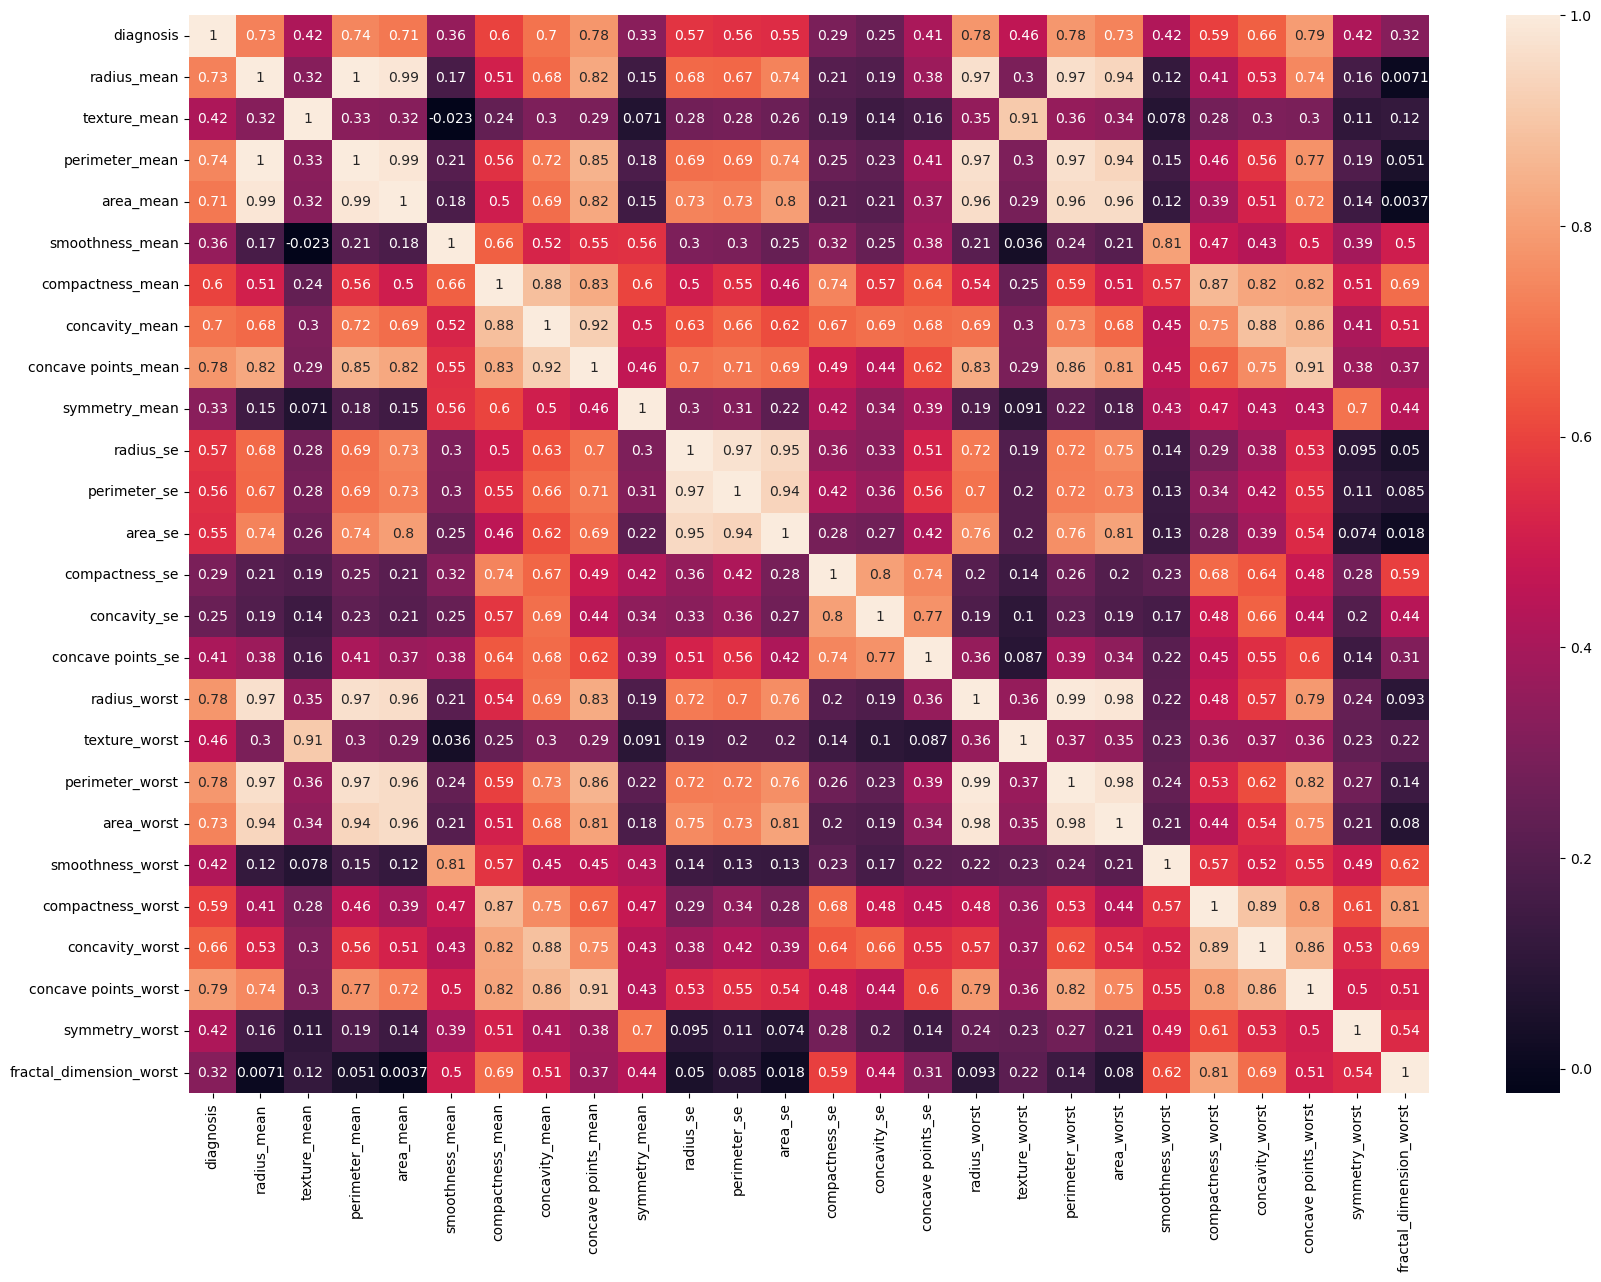

In [32]:
plt.figure(figsize = (20, 14))
sns.heatmap(data2.corr(), annot = True)
plt.show()

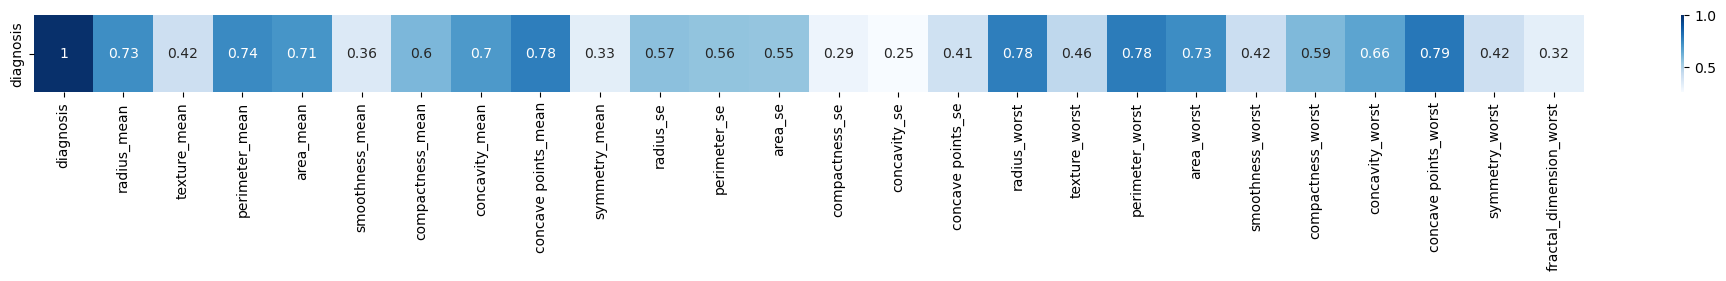

In [33]:
plt.figure(figsize=(25,1))
corr_target = data2.corr()['diagnosis'].to_frame()
sns.heatmap(corr_target.T,annot=True,cmap='Blues');

In [34]:
data2_y = data2['diagnosis']
data2_X = data.drop(columns='diagnosis')
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(data2_X, data2_y, test_size=0.2, random_state=42)

In [35]:
print("X_train_corr şekli:", X_train_corr.shape)
print("X_test_corr şekli:", X_test_corr.shape)
print("y_train_corr şekli:", y_train_corr.shape)
print("y_test_corr şekli:", y_test_corr.shape)

X_train_corr şekli: (455, 31)
X_test_corr şekli: (114, 31)
y_train_corr şekli: (455,)
y_test_corr şekli: (114,)


###  >>> Hyperparameter Tuning

In [36]:
#Hyperparameter Tuning
model_1 = LogisticRegression(random_state=42,max_iter=7000,solver='liblinear')
param_grid = [
    {
    'penalty':['l1','l2'] ,
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
]
grid = GridSearchCV(model_1,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 1000, 'penalty': 'l2'}

### >>> Applying Machine Learning Algorithms

#### 1) Training using Logisitc Regression and Evaluation Results

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Test veri setinde prediction
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", accuracy_logreg)

f1_logreg = f1_score(y_test, y_pred_logreg)
print("F1 Score:", f1_logreg)

Logistic Regression Accuracy: 0.9571428571428572
F1 Score: 0.8421052631578948


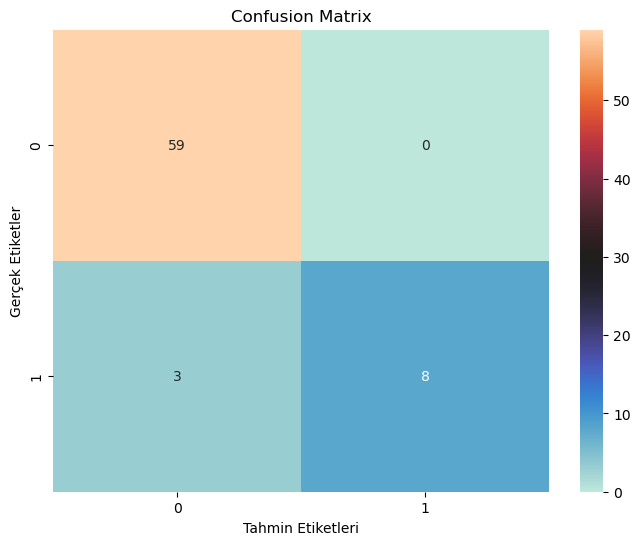

In [38]:
cm_lg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt="d", cmap="icefire")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Etiketleri")
plt.ylabel("Gerçek Etiketler")
plt.show()

#### 1.1) Logistic Regression with Parameter Tuning

In [39]:
model_1 = LogisticRegression(random_state=42,max_iter=7000,C=1000,penalty='l2',solver='liblinear')
model_1.fit(X_train,y_train)

LogisticRegression(C=1000, max_iter=7000, random_state=42, solver='liblinear')

In [40]:
y_proba_train_lr_pt = model_1.predict_proba(X_train)
y_pred_train_lr_pt = (y_proba_train_lr_pt[:,1]>=0.37599)
print(classification_report(y_train,y_pred_train_lr_pt,zero_division=0) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       204
           1       0.96      0.93      0.94        72

    accuracy                           0.97       276
   macro avg       0.97      0.96      0.96       276
weighted avg       0.97      0.97      0.97       276



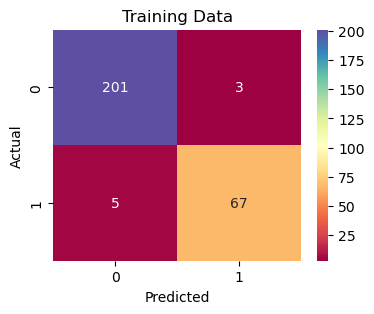

In [41]:
#confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_pred_train_lr_pt),annot=True,fmt='d', cmap='Spectral')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Training Data');

After tuning the parameter for Logistic Regression, a high success rate of %94-98's was obtained in the f1 score, which is important for the breast cancer classification problem.

#### 2) Training using Naive Bayes and Evaluation Results

In [42]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Test veri setinde prediction
y_pred_nb = naive_bayes.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Classifier Accuracy:", accuracy_nb)

f1_nb = f1_score(y_test, y_pred_nb)
print("F1 Score:", f1_nb)

Naive Bayes Classifier Accuracy: 0.9285714285714286
F1 Score: 0.761904761904762


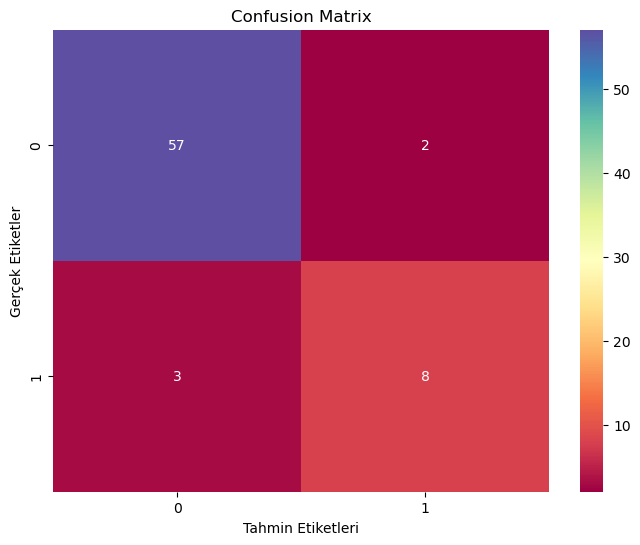

In [43]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Spectral")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Etiketleri")
plt.ylabel("Gerçek Etiketler")
plt.show()

#### 3) Training using KNN Classifier and Evaluation Results

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Test veri setinde prediction
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)

f1_knn = f1_score(y_test, y_pred_knn)
print("F1 Score:", f1_knn)

KNN Accuracy: 0.9285714285714286
F1 Score: 0.761904761904762


The accuracy is good but f1 score also important for us! 

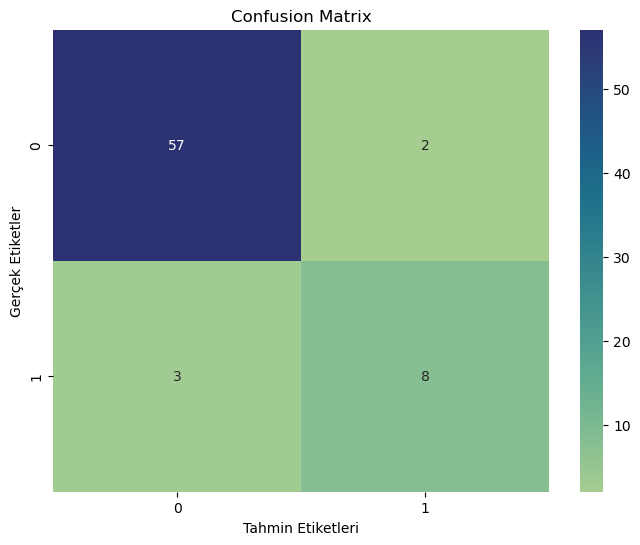

In [45]:
cm_knn = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="crest")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Etiketleri")
plt.ylabel("Gerçek Etiketler")
plt.show()

#### 4) Random Forest Classifier

In [46]:
rfc= RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [47]:
y_train_pred_rf =rfc.predict(X_train)
y_train_prob_rf =rfc.predict_proba(X_train)[:,1]

In [48]:
print("Accuracy Score of train", accuracy_score(y_train,y_train_pred_rf))
print("AUC of the train ", roc_auc_score(y_train,y_train_prob_rf))

Accuracy Score of train 0.9963768115942029
AUC of the train  1.0


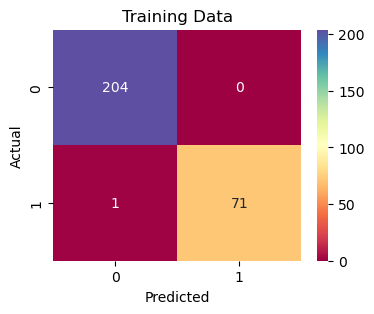

In [49]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_train_pred_rf),annot=True,fmt='d', cmap='Spectral')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Training Data');

#### 5) Decision Tree Classifier

In [50]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
# Make predictions on the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

Accuracy: 0.9571428571428572


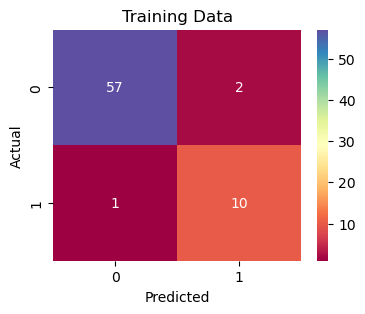

In [52]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='d', cmap='Spectral')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Training Data');

### Additional Evaluations

- In this study, FN (diagnosing a patient with cancer, not cancer), that is, type 2 error is the error we want to minimize. The measurement metric we can use to minimize FN is Recall (Sensitivity/TPR).

In [53]:
# Logistic Regression sonucu için Recall hesabı
recall_lr = recall_score(y_test, y_pred_logreg)
recall_lr_formatted = "{:.4f}".format(recall_lr)
print("Sensitivity (Recall) for Logistic Regression:", recall_lr_formatted)

Sensitivity (Recall) for Logistic Regression: 0.7273


In [54]:
# Logistic Regression ve Prameter Tuning sonucu için Recall hesabı
recall_lr_pt = recall_score(y_train, y_pred_train_lr_pt)
recall_lr_pt_formatted = "{:.4f}".format(recall_lr_pt)
print("Sensitivity (Recall) for Logistic Regression after Parameter Tuning:", recall_lr_pt_formatted)

Sensitivity (Recall) for Logistic Regression after Parameter Tuning: 0.9306


In [55]:
# Naive Bayes Classifier sonucu için Recall hesabı
recall_nb = recall_score(y_test, y_pred_nb)
recall_nb_formatted = "{:.4f}".format(recall_nb)
print("Sensitivity (Recall) for Naive Bayes Classifier:", recall_nb_formatted)

Sensitivity (Recall) for Naive Bayes Classifier: 0.7273


In [56]:
# KNN sonucu için Recall hesabı
recall_knn = recall_score(y_test, y_pred_knn)
recall_knn_formatted = "{:.4f}".format(recall_knn)
print("Sensitivity (Recall) for KNN:", recall_knn_formatted)

Sensitivity (Recall) for KNN: 0.7273


In [57]:
# Random Forest Classifier sonucu için Recall hesabı
recall_randfor = recall_score(y_train, y_train_pred_rf)
recall_randfor_formatted = "{:.4f}".format(recall_randfor)
print("Sensitivity (Recall) for Random Forest Classifier:", recall_randfor_formatted)

Sensitivity (Recall) for Random Forest Classifier: 0.9861


In [58]:
#  Decision Tree Classifier sonucu için Recall hesabı
recall_dectree = recall_score(y_test, y_pred_dt)
recall_dectree_formatted = "{:.4f}".format(recall_dectree)
print("Sensitivity (Recall) for Decision Tree Classifier:", recall_dectree_formatted)

Sensitivity (Recall) for Decision Tree Classifier: 0.9091


### Clustering Methods

#### 1) Training using K-means and Evaluation Results

In [59]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

labels_kmeans = kmeans.labels_
centers_kmeans = kmeans.cluster_centers_

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


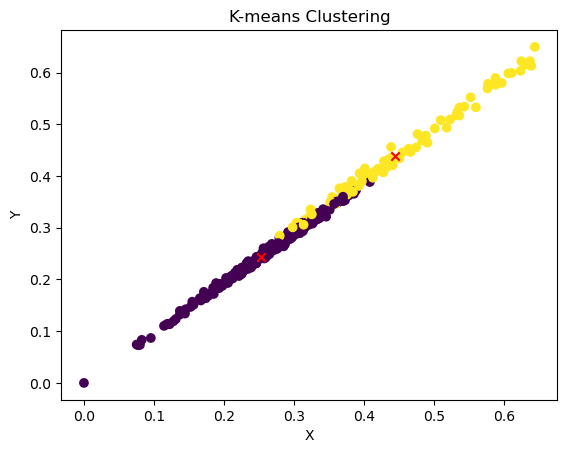

In [60]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels_kmeans)
plt.scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], c='red', marker='x')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()

In [61]:
# Evaluate K-means

silhouette_score_kmeans = silhouette_score(X_train, labels_kmeans)
calinski_harabasz_score_kmeans = calinski_harabasz_score(X_train, labels_kmeans)
davies_bouldin_score_kmeans = davies_bouldin_score(X_train, labels_kmeans)
homogeneity_kmeans, completeness_kmeans, v_measure_kmeans = homogeneity_completeness_v_measure(y_train, labels_kmeans)

print("K-means evaluation metrics:")
print("Silhouette Score:", silhouette_score_kmeans)
print("Calinski-Harabasz Index:", calinski_harabasz_score_kmeans)
print("Davies-Bouldin Index:", davies_bouldin_score_kmeans)
print("Homogeneity:", homogeneity_kmeans)
print("Completeness:", completeness_kmeans)
print("V-measure:", v_measure_kmeans)
print()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
K-means evaluation metrics:
Silhouette Score: 0.5185024649060113
Calinski-Harabasz Index: 383.9979599743814
Davies-Bouldin Index: 0.7671974734029658
Homogeneity: 0.5768535036423567
Completeness: 0.5362118243211786
V-measure: 0.555790683229808



Silhouette Score: Kümeleme sonuçlarının kalitesini ölçer. Bu metrik, her bir veri noktasının kendi kümesine olan benzerliği ile diğer kümelere olan benzerliği arasındaki farkı hesaplar. Silhouette score, -1 ile 1 arasında değer alır ve daha yüksek değerler daha iyi bir kümeleme sonucunu gösterir.

#### 1.1) K-Means Parameter Tuning

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


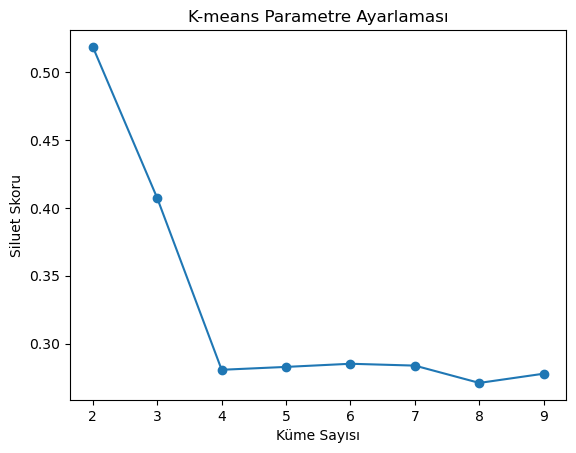

In [62]:
best_score = 0.0 

# Kümelerin sayısını belirlemek için siluet skorunu hesaplayan bir fonksiyon
def get_silhouette_score(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

# Kümelerin sayısını denemek için bir liste oluşturma
cluster_values = range(2, 10)

# Her küme sayısı için siluet skorlarını değerlendirme
silhouette_scores = []
for n_clusters in cluster_values:
    score = get_silhouette_score(n_clusters, X_train)
    silhouette_scores.append(score)
    if score > best_score:
            best_score = score
            best_n_clusters = n_clusters

# En iyi küme sayısını ve siluet skorunu yazdırma
print("En iyi küme sayısı: {}, En iyi siluet skoru: {}".format(best_n_clusters, best_score))

# Küme sayılarını ve siluet skorlarını görselleştirme
plt.plot(cluster_values, silhouette_scores, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('Siluet Skoru')
plt.title('K-means Parametre Ayarlaması')
plt.show()


In [63]:
# En iyi küme sayısıyla tekrar K-means uygulama
best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
best_kmeans.fit(X_train)

# Eğitim verilerinin tahminlerini al
y_pred_train_Kmeans_pt = best_kmeans.labels_

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


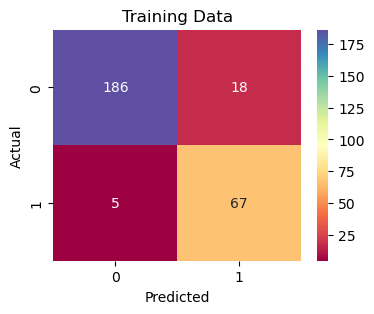

In [64]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_train,y_pred_train_Kmeans_pt),annot=True,fmt='d', cmap='Spectral')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Training Data');

#### 2) Training using Gaussian Mixture Models and Evaluation Results

In [65]:
gmm = GaussianMixture(n_components=2)

gmm.fit(X_train)
labels_g = gmm.predict(X_train)

probs_g = gmm.predict_proba(X_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


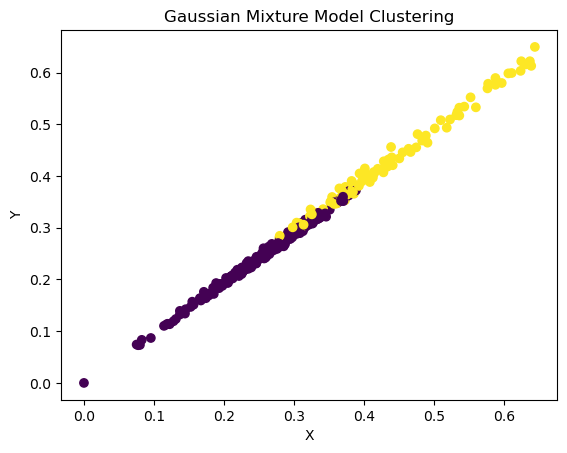

In [66]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels_g)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Model Clustering')

plt.show()

In [67]:
silhouette_score_gmm = silhouette_score(X_train, labels_g)
calinski_harabasz_score_gmm = calinski_harabasz_score(X_train, labels_g)
davies_bouldin_score_gmm = davies_bouldin_score(X_train, labels_g)
homogeneity_gmm, completeness_gmm, v_measure_gmm = homogeneity_completeness_v_measure(y_train, labels_g)

print("GMM evaluation metrics:")
print("Silhouette Score:", silhouette_score_gmm)
print("Calinski-Harabasz Index:", calinski_harabasz_score_gmm)
print("Davies-Bouldin Index:", davies_bouldin_score_gmm)
print("Homogeneity:", homogeneity_gmm)
print("Completeness:", completeness_gmm)
print("V-measure:", v_measure_gmm)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
GMM evaluation metrics:
Silhouette Score: 0.495310743643443
Calinski-Harabasz Index: 356.8364403742716
Davies-Bouldin Index: 0.7991546639651418
Homogeneity: 0.6292758754969145
Completeness: 0.5720582502611076
V-measure: 0.5993044708376173


### Comparisons of K-Means vs. Gaussian Mixture Models (GMM)

In [68]:
tbl = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index', 'Homogeneity', 'Completeness', 'V-measure'],
    'K-means': [silhouette_score_kmeans, calinski_harabasz_score_kmeans, davies_bouldin_score_kmeans, homogeneity_kmeans, completeness_kmeans, v_measure_kmeans],
    'GMM': [silhouette_score_gmm, calinski_harabasz_score_gmm, davies_bouldin_score_gmm, homogeneity_gmm, completeness_gmm, v_measure_gmm]
}

df_tbl = pd.DataFrame(tbl)
print(df_tbl)

                    Metric     K-means         GMM
0         Silhouette Score    0.518502    0.495311
1  Calinski-Harabasz Index  383.997960  356.836440
2     Davies-Bouldin Index    0.767197    0.799155
3              Homogeneity    0.576854    0.629276
4             Completeness    0.536212    0.572058
5                V-measure    0.555791    0.599304


### Multimodel Parameter Tuning

In [69]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10],
            'criterion': ['gini', 'entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10],
            'penalty': ['l1', 'l2', 'none']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-6, 1e-7, 1e-8, 1e-9]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'splitter': ['best', 'random']
        }
    }
}

#### 1) Grid Search

In [70]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, scoring=['accuracy'], refit='accuracy')
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated 

In [71]:
grid_search_df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
grid_search_df

,model,best_score,best_params
0,random_forest,0.956063,"{'criterion': 'entropy', 'n_estimators': 5}"
1,logistic_regression,0.574787,"{'C': 1, 'penalty': 'l2'}"
2,naive_bayes_gaussian,0.620401,{'var_smoothing': 1e-06}
3,decision_tree,0.940258,"{'criterion': 'entropy', 'splitter': 'random'}"


#### 2) Random Search

In [72]:
scores_rs = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, n_iter = 10, scoring=['accuracy'], refit='accuracy')
    clf.fit(X, y)
    scores_rs.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depre

In [73]:
random_df = pd.DataFrame(scores_rs, columns=['model','best_score','best_params'])
random_df

,model,best_score,best_params
0,random_forest,0.956032,"{'n_estimators': 5, 'criterion': 'gini'}"
1,logistic_regression,0.574787,"{'penalty': 'l2', 'C': 1}"
2,naive_bayes_gaussian,0.620401,{'var_smoothing': 1e-06}
3,decision_tree,0.940258,"{'splitter': 'best', 'criterion': 'entropy'}"


### Pipeline

#### Pipeline for PCA, Std Scale, Logistic Regression and Random Forest Classifier

In [74]:
# Define PCA
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()
# Define classifier
logistic = LogisticRegression()
rnd_forest = RandomForestClassifier()

In [75]:
# Define pipeline steps
pipe = Pipeline(
            steps=[
                ("scaler", scaler), 
                ("pca", pca), 
                ("logistic", logistic)
            ]
)

In [76]:
# Define Parameter Grid
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler()],
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
    "logistic__penalty": ['l1', 'l2', 'none']
}

In [77]:
# Apply Parameter Tuning
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X1, y1)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbus

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbus

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbus

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

Best parameter (CV score=0.975):
{'logistic__C': 21.54434690031882, 'logistic__penalty': 'l2', 'pca__n_components': 30, 'scaler': MinMaxScaler()}


/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbus

In [78]:
# Visualize Results  
result_pipeline_df = pd.DataFrame(search.cv_results_)
result_pipeline_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010966,0.009277,0.000000,0.000000,0.0001,l1,5,StandardScaler(),"{'logistic__C': 0.0001, 'logistic__penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
1,0.002340,0.000100,0.000000,0.000000,0.0001,l1,5,MinMaxScaler(),"{'logistic__C': 0.0001, 'logistic__penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
2,0.002714,0.000497,0.000000,0.000000,0.0001,l1,15,StandardScaler(),"{'logistic__C': 0.0001, 'logistic__penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
3,0.002281,0.000102,0.000000,0.000000,0.0001,l1,15,MinMaxScaler(),"{'logistic__C': 0.0001, 'logistic__penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
4,0.002357,0.000041,0.000000,0.000000,0.0001,l1,30,StandardScaler(),"{'logistic__C': 0.0001, 'logistic__penalty': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.010729,0.002731,0.001091,0.000045,10000.0,none,30,MinMaxScaler(),"{'logistic__C': 10000.0, 'logistic__penalty': ...",0.947368,0.95614,0.929825,0.964912,0.99115,0.957879,0.020283,31
116,0.001575,0.000076,0.000000,0.000000,10000.0,none,45,StandardScaler(),"{'logistic__C': 10000.0, 'logistic__penalty': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
117,0.001489,0.000072,0.000000,0.000000,10000.0,none,45,MinMaxScaler(),"{'logistic__C': 10000.0, 'logistic__penalty': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
118,0.001554,0.000065,0.000000,0.000000,10000.0,none,60,StandardScaler(),"{'logistic__C': 10000.0, 'logistic__penalty': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49


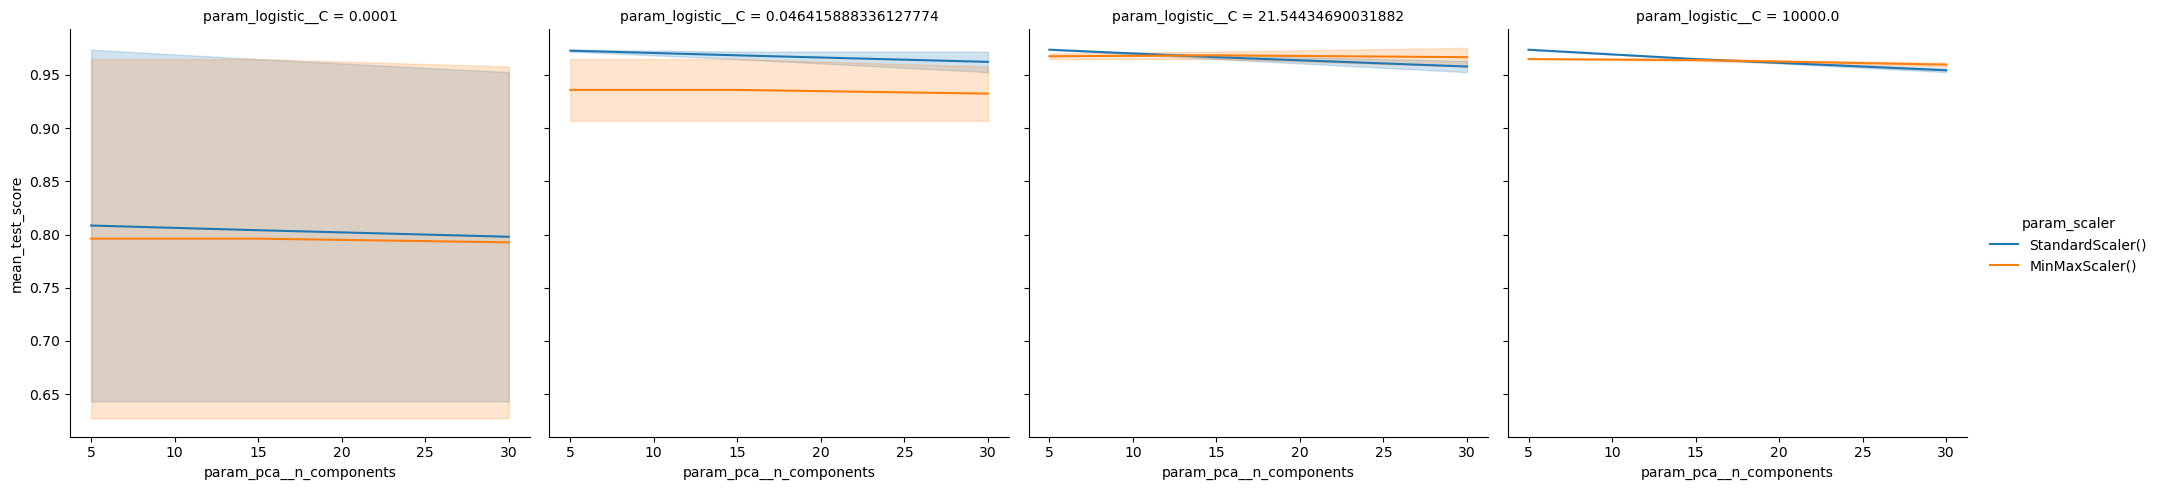

In [79]:
import seaborn as sns
sns.relplot(data=result_pipeline_df,
	kind='line',
	x='param_pca__n_components',
	y='mean_test_score',
	hue='param_scaler',
	col='param_logistic__C')
plt.show()

#### Pipeline with Grid Search for Logistic Regression and Random Forest Classifier

In [80]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator = None):
        self.estimator = estimator
    
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self
    
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    
    def score(self, X, y):
        return self.estimator.score(X, y)
    

In [81]:
pipe = Pipeline(
            steps=[
                ("scaler", scaler), 
                ("pca", pca), 
                ("clf", ClfSwitcher())
            ]
)

In [82]:
parameters = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        "pca__n_components": [5, 15, 30, 45, 60],
        "clf__estimator": [LogisticRegression()],
        "clf__estimator__C": np.logspace(-4, 4, 4),
        "clf__estimator__penalty": ['l1', 'l2', 'none']
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        "pca__n_components": [5, 15, 30, 45, 60],
        "clf__estimator": [rnd_forest],
        "clf__estimator__n_estimators": [1,5,10],
        "clf__estimator__criterion": ['gini', 'entropy']
    },
]

In [83]:
search = GridSearchCV(pipe, parameters, cv=5, n_jobs=2)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbus

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbus

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbus

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore 

/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kevserbus

Best parameter (CV score=0.977):
{'clf__estimator': LogisticRegression(C=21.54434690031882), 'clf__estimator__C': 21.54434690031882, 'clf__estimator__penalty': 'l2', 'pca__n_components': 15, 'scaler': MinMaxScaler()}


/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kevserbusrayildirim/opt/anaconda3/envs/myenv_x86/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/var/folders/81/txnkj61j6

In [84]:
from pandas import DataFrame   
result_df_gs = result_df_gs = pd.DataFrame(search.cv_results_)
result_df_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__estimator,param_clf__estimator__C,param_clf__estimator__penalty,param_pca__n_components,param_scaler,param_clf__estimator__criterion,param_clf__estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002497,0.000198,0.000000,0.000000,LogisticRegression(C=21.54434690031882),0.0001,l1,5,StandardScaler(),NaN,NaN,{'clf__estimator': LogisticRegression(C=21.544...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
1,0.002228,0.000136,0.000000,0.000000,LogisticRegression(C=21.54434690031882),0.0001,l1,5,MinMaxScaler(),NaN,NaN,{'clf__estimator': LogisticRegression(C=21.544...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
2,0.002140,0.000104,0.000000,0.000000,LogisticRegression(C=21.54434690031882),0.0001,l1,15,StandardScaler(),NaN,NaN,{'clf__estimator': LogisticRegression(C=21.544...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
3,0.002050,0.000065,0.000000,0.000000,LogisticRegression(C=21.54434690031882),0.0001,l1,15,MinMaxScaler(),NaN,NaN,{'clf__estimator': LogisticRegression(C=21.544...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
4,0.002237,0.000154,0.000000,0.000000,LogisticRegression(C=21.54434690031882),0.0001,l1,30,StandardScaler(),NaN,NaN,{'clf__estimator': LogisticRegression(C=21.544...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.016925,0.000147,0.001373,0.000003,RandomForestClassifier(),NaN,NaN,30,MinMaxScaler(),entropy,10,"{'clf__estimator': RandomForestClassifier(), '...",0.850877,0.921053,0.929825,0.964912,0.911504,0.915634,0.037066,59
176,0.001431,0.000025,0.000000,0.000000,RandomForestClassifier(),NaN,NaN,45,StandardScaler(),entropy,10,"{'clf__estimator': RandomForestClassifier(), '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
177,0.001333,0.000004,0.000000,0.000000,RandomForestClassifier(),NaN,NaN,45,MinMaxScaler(),entropy,10,"{'clf__estimator': RandomForestClassifier(), '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
178,0.001515,0.000092,0.000000,0.000000,RandomForestClassifier(),NaN,NaN,60,StandardScaler(),entropy,10,"{'clf__estimator': RandomForestClassifier(), '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,85


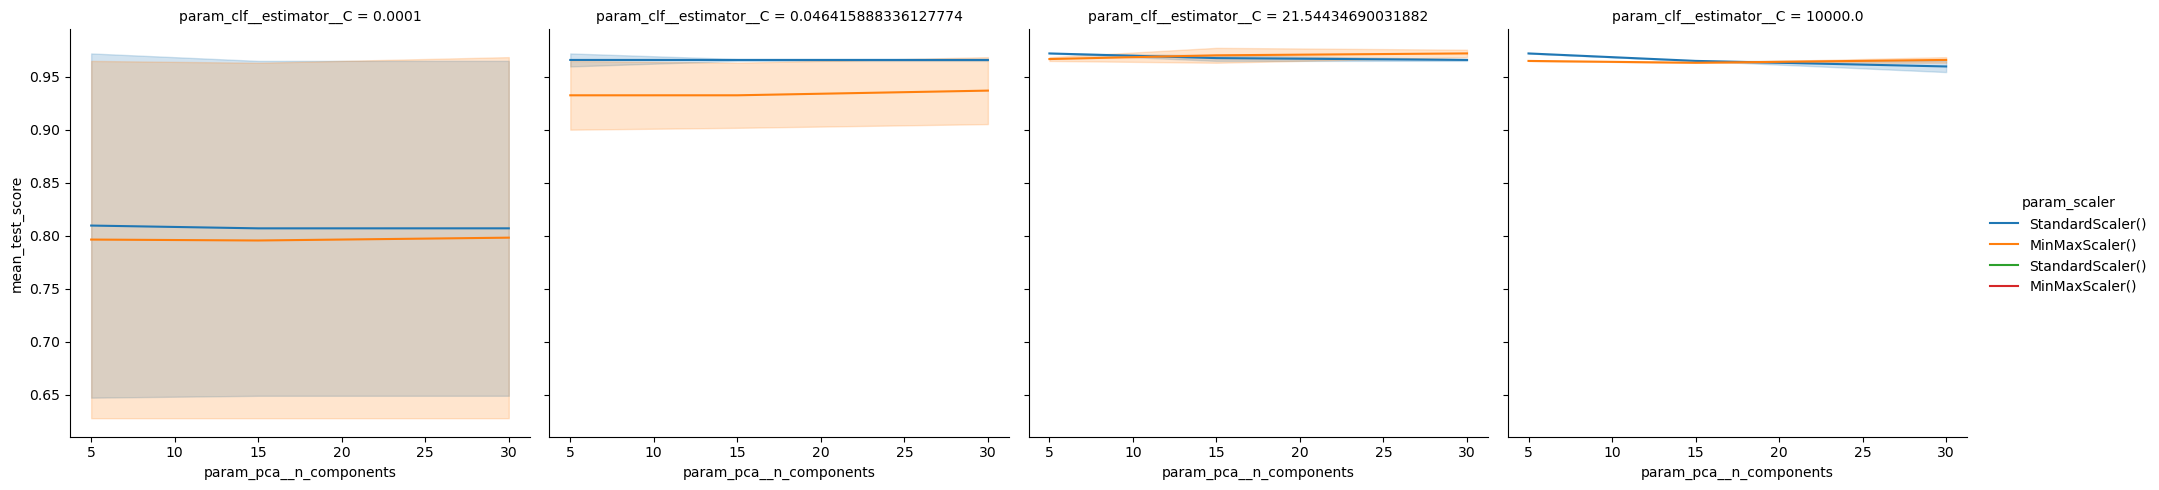

In [85]:
import seaborn as sns
sns.relplot(data=result_df_gs,
	kind='line',
	x='param_pca__n_components',
	y='mean_test_score',
	hue='param_scaler',
	col='param_clf__estimator__C')
plt.show()

In [86]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', LogisticRegression())
])

In [87]:
parameters = {
    'pca__n_components': [2, 5, 10],
    'clf__C': [0.1, 1, 10]
}

# Remove 'selection' from parameters dictionary
parameters = {key: value for key, value in parameters.items() if key != 'selection'}


In [88]:
search = GridSearchCV(pipe, parameters, cv=5, n_jobs=2, scoring='accuracy')
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.982):
{'clf__C': 1, 'pca__n_components': 10}


In [89]:
search.best_score_

0.982425089271852